## IMPORT DEPENDENCIES

In [1]:
# IMPORT SQLALCHEMY DEPENDENCIES

# Python SQL toolkit and Object Relational Mapper (ORM)
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import extract


#This function's primary purpose is to set up the ability to query a SQLite database.
from sqlalchemy import create_engine, func


#IMPORT OTHER DEPENDENCIES

# Allows to see the graphs in the notebook
%matplotlib inline

#Library for visualization
#Pyplot module, a dependency that provides us with a MATLAB-like plotting framework
import matplotlib.pyplot as plt

#This will import style from Matplotlib
from matplotlib import style
style.use('fivethirtyeight')


import numpy as np
import pandas as pd

#We'll use datetime in this module because we'll need to calculate some data points that have to do with dates
import datetime as dt

## GET STARTED WITH SQLalchemy

In [2]:
#Location of the SQLite database file. 
engine = create_engine("sqlite:///hawaii.sqlite")
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

#Confirm that the Automap was able to find all of the data in the SQLite database. 
#Base.classes gives us access to all the classes and keys() references all the names of the classes.
Base.classes.keys()

['measurement', 'station']

In [3]:
# Save references to each table
Measurement = Base.classes.measurement 
Station = Base.classes.station 
# Create session (link) from Python to the DB
session = Session(engine)
#query date and precipitation columns
results = session.query(Measurement.date, Measurement.prcp).all()

In [4]:
#print out results
for result in results:
    print(result)

('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)
('2010-01-12', 0.0)
('2010-01-14', 0.0)
('2010-01-15', 0.0)
('2010-01-16', 0.0)
('2010-01-17', 0.0)
('2010-01-18', 0.0)
('2010-01-19', 0.0)
('2010-01-20', 0.0)
('2010-01-21', 0.0)
('2010-01-22', 0.0)
('2010-01-23', 0.0)
('2010-01-24', 0.01)
('2010-01-25', 0.0)
('2010-01-26', 0.04)
('2010-01-27', 0.12)
('2010-01-28', 0.0)
('2010-01-30', None)
('2010-01-31', 0.03)
('2010-02-01', 0.01)
('2010-02-03', None)
('2010-02-04', 0.01)
('2010-02-05', 0.0)
('2010-02-06', 0.0)
('2010-02-07', 0.0)
('2010-02-08', 0.0)
('2010-02-09', 0.0)
('2010-02-11', 0.0)
('2010-02-12', 0.02)
('2010-02-13', 0.01)
('2010-02-14', 0.0)
('2010-02-15', 0.0)
('2010-02-16', 0.0)
('2010-02-17', 0.0)
('2010-02-19', None)
('2010-02-20', 0.03)
('2010-02-21', 0.0)
('2010-02-22', 0.0)
('2010-02-23', 0.0)
('2010-02-24', 0.0)
('20

('2015-07-23', 0.0)
('2015-07-24', 0.0)
('2015-07-25', 0.0)
('2015-07-26', 0.0)
('2015-07-27', 0.0)
('2015-07-28', 0.0)
('2015-07-29', 0.0)
('2015-07-30', 0.0)
('2015-07-31', 0.0)
('2015-08-01', 0.02)
('2015-08-02', 0.0)
('2015-08-03', 0.0)
('2015-08-04', 0.0)
('2015-08-05', 0.0)
('2015-08-06', 0.1)
('2015-08-07', 0.14)
('2015-08-08', 0.0)
('2015-08-09', 0.0)
('2015-08-10', 0.01)
('2015-08-11', 0.0)
('2015-08-12', 0.0)
('2015-08-13', 0.0)
('2015-08-14', 0.0)
('2015-08-15', 0.01)
('2015-08-16', 0.0)
('2015-08-17', 0.01)
('2015-08-18', 0.06)
('2015-08-19', None)
('2015-08-20', None)
('2015-08-21', 0.0)
('2015-08-22', 0.0)
('2015-08-23', 0.02)
('2015-08-24', 0.42)
('2015-08-25', 0.2)
('2015-08-26', 0.62)
('2015-08-27', 0.62)
('2015-08-28', 0.06)
('2015-08-29', 0.0)
('2015-08-30', 0.0)
('2015-08-31', 0.0)
('2015-09-01', 0.0)
('2015-09-02', 0.0)
('2015-09-03', 0.23)
('2015-09-04', 0.52)
('2015-09-05', 0.08)
('2015-09-06', 0.0)
('2015-09-07', 0.06)
('2015-09-08', 0.01)
('2015-09-09', 0.0)
('

('2012-02-02', 0.0)
('2012-02-03', 0.0)
('2012-02-04', 0.0)
('2012-02-05', 0.0)
('2012-02-06', 0.04)
('2012-02-07', 0.28)
('2012-02-08', 0.5)
('2012-02-09', 0.0)
('2012-02-10', 0.0)
('2012-02-11', 0.01)
('2012-02-12', 0.0)
('2012-02-13', 0.01)
('2012-02-14', 0.0)
('2012-02-15', 0.0)
('2012-02-16', 0.0)
('2012-02-17', 0.12)
('2012-02-18', 0.01)
('2012-02-19', 0.07)
('2012-02-20', 0.01)
('2012-02-21', 0.0)
('2012-02-22', 0.05)
('2012-02-23', 0.04)
('2012-02-24', 0.0)
('2012-02-25', 0.01)
('2012-02-26', 0.23)
('2012-02-27', 0.0)
('2012-02-28', 0.0)
('2012-02-29', 0.0)
('2012-03-01', 0.0)
('2012-03-02', 0.0)
('2012-03-03', 0.05)
('2012-03-04', 0.03)
('2012-03-05', 5.71)
('2012-03-06', 2.33)
('2012-03-07', 2.41)
('2012-03-08', 0.59)
('2012-03-09', 4.6)
('2012-03-10', 0.4)
('2012-03-11', 0.07)
('2012-03-12', 0.1)
('2012-03-13', 0.0)
('2012-03-14', 0.0)
('2012-03-15', 0.03)
('2012-03-16', 0.01)
('2012-03-17', 0.0)
('2012-03-18', 0.05)
('2012-03-19', 0.07)
('2012-03-20', 0.0)
('2012-03-21', 0.

('2016-04-20', 0.0)
('2016-04-21', 0.01)
('2016-04-22', 0.0)
('2016-04-23', 0.21)
('2016-04-24', 0.11)
('2016-04-25', 0.06)
('2016-04-26', 0.01)
('2016-04-27', 0.05)
('2016-04-28', 0.0)
('2016-04-29', 0.0)
('2016-04-30', 0.0)
('2016-05-01', 0.04)
('2016-05-02', 0.0)
('2016-05-03', 0.02)
('2016-05-04', 0.12)
('2016-05-05', 0.6)
('2016-05-06', 0.22)
('2016-05-07', 1.53)
('2016-05-08', 0.8)
('2016-05-09', 0.1)
('2016-05-10', 0.15)
('2016-05-11', 0.02)
('2016-05-12', 0.0)
('2016-05-13', 0.0)
('2016-05-14', 0.18)
('2016-05-15', 0.02)
('2016-05-16', 0.0)
('2016-05-17', 0.03)
('2016-05-18', 0.05)
('2016-05-19', 0.05)
('2016-05-20', 0.15)
('2016-05-21', 0.08)
('2016-05-22', 0.0)
('2016-05-23', 0.0)
('2016-05-24', 0.0)
('2016-05-25', 0.0)
('2016-05-26', 0.8)
('2016-05-27', 0.05)
('2016-05-28', 0.0)
('2016-05-29', 0.0)
('2016-05-30', 0.03)
('2016-05-31', 0.18)
('2016-06-01', 0.89)
('2016-06-02', 0.15)
('2016-06-03', 0.16)
('2016-06-04', 0.0)
('2016-06-05', 0.63)
('2016-06-06', 0.36)
('2016-06-07

('2013-10-06', None)
('2013-10-07', 0.24)
('2013-10-08', 0.01)
('2013-10-09', 0.31)
('2013-10-10', 0.0)
('2013-10-11', 1.95)
('2013-10-14', None)
('2013-10-15', 0.09)
('2013-10-16', 0.02)
('2013-10-17', 0.0)
('2013-10-18', 0.01)
('2013-10-19', 0.05)
('2013-10-20', 0.0)
('2013-10-21', 0.0)
('2013-10-22', 0.0)
('2013-10-23', 0.0)
('2013-10-24', 0.0)
('2013-10-25', 0.0)
('2013-10-26', 0.0)
('2013-10-28', None)
('2013-10-29', 0.0)
('2013-10-30', 0.0)
('2013-10-31', 0.1)
('2013-11-01', 0.0)
('2013-11-04', None)
('2013-11-05', 0.0)
('2013-11-06', 0.14)
('2013-11-07', 0.62)
('2013-11-08', 1.55)
('2013-11-09', 0.87)
('2013-11-10', 2.77)
('2013-11-11', 0.32)
('2013-11-12', 0.03)
('2013-11-13', 0.0)
('2013-11-14', 0.0)
('2013-11-15', 0.47)
('2013-11-16', 0.0)
('2013-11-17', 0.0)
('2013-11-18', 0.04)
('2013-11-19', 0.0)
('2013-11-20', 0.0)
('2013-11-21', 0.0)
('2013-11-22', 0.0)
('2013-11-23', 0.09)
('2013-11-25', None)
('2013-11-26', 0.0)
('2013-11-27', 0.0)
('2013-11-29', None)
('2013-11-30', 0

('2011-11-18', 0.0)
('2011-11-21', 0.0)
('2011-11-22', None)
('2011-11-23', None)
('2011-11-28', None)
('2011-11-29', 0.0)
('2011-11-30', 0.12)
('2011-12-01', 0.0)
('2011-12-02', 0.0)
('2011-12-05', 0.0)
('2011-12-06', 0.0)
('2011-12-07', 0.07)
('2011-12-08', 0.05)
('2011-12-09', 0.16)
('2011-12-12', None)
('2011-12-13', 2.8)
('2011-12-14', 0.86)
('2011-12-15', 0.02)
('2011-12-16', None)
('2012-01-04', 0.0)
('2012-01-05', 0.0)
('2012-01-06', 0.0)
('2012-01-09', 0.0)
('2012-01-10', 0.0)
('2012-01-11', None)
('2012-01-12', None)
('2012-01-13', None)
('2012-01-17', 0.0)
('2012-01-18', 0.0)
('2012-01-19', 0.0)
('2012-01-20', 0.0)
('2012-01-23', 0.0)
('2012-01-24', 0.0)
('2012-01-25', 0.0)
('2012-01-26', 0.0)
('2012-01-27', 0.33)
('2012-01-31', 0.0)
('2012-02-01', 0.0)
('2012-02-02', 0.0)
('2012-02-03', 0.0)
('2012-02-06', None)
('2012-02-07', 0.48)
('2012-02-08', 0.32)
('2012-02-09', 0.0)
('2012-02-10', 0.0)
('2012-02-13', None)
('2012-02-14', 0.0)
('2012-02-15', 0.0)
('2012-02-16', None)


('2011-03-27', 0.0)
('2011-03-29', 0.0)
('2011-03-30', 0.0)
('2011-03-31', 0.0)
('2011-04-01', 0.07)
('2011-04-02', 0.0)
('2011-04-03', 0.0)
('2011-04-04', 0.0)
('2011-04-05', 0.0)
('2011-04-06', 0.11)
('2011-04-07', 0.5)
('2011-04-08', 0.68)
('2011-04-09', 0.02)
('2011-04-10', 0.01)
('2011-04-11', 0.0)
('2011-04-12', 0.0)
('2011-04-13', 0.0)
('2011-04-14', 0.2)
('2011-04-15', 0.0)
('2011-04-16', 0.22)
('2011-04-17', 0.0)
('2011-04-18', 0.0)
('2011-04-19', 0.0)
('2011-04-20', 0.0)
('2011-04-21', 0.0)
('2011-04-22', 0.0)
('2011-04-23', 0.0)
('2011-04-24', 0.0)
('2011-04-25', 0.0)
('2011-04-26', 0.0)
('2011-04-27', 0.0)
('2011-04-28', 0.0)
('2011-04-29', 0.07)
('2011-04-30', 0.0)
('2011-05-01', 0.0)
('2011-05-02', 0.0)
('2011-05-03', 1.03)
('2011-05-04', 0.06)
('2011-05-05', 0.0)
('2011-05-06', 0.19)
('2011-05-07', 0.2)
('2011-05-08', 0.51)
('2011-05-09', 0.1)
('2011-05-10', 0.05)
('2011-05-11', 0.15)
('2011-05-12', 0.01)
('2011-05-13', 0.01)
('2011-05-14', 0.0)
('2011-05-15', 0.0)
('201

('2015-11-25', 0.13)
('2015-11-26', 0.58)
('2015-11-27', 0.49)
('2015-11-28', 0.02)
('2015-11-29', 0.14)
('2015-11-30', 0.01)
('2015-12-02', None)
('2015-12-03', 0.03)
('2015-12-04', 0.0)
('2015-12-05', 0.0)
('2015-12-07', None)
('2015-12-08', 0.04)
('2015-12-09', 0.13)
('2015-12-10', 0.14)
('2015-12-11', 0.06)
('2015-12-12', 0.41)
('2015-12-13', 0.01)
('2015-12-14', 0.03)
('2015-12-15', 0.28)
('2015-12-16', 0.0)
('2015-12-17', 0.06)
('2015-12-18', 0.12)
('2015-12-19', 0.24)
('2015-12-20', 0.04)
('2015-12-22', None)
('2015-12-23', 0.0)
('2015-12-24', 0.0)
('2015-12-25', 0.23)
('2015-12-26', 0.15)
('2015-12-27', 0.48)
('2015-12-28', 0.05)
('2015-12-29', 0.01)
('2015-12-31', None)
('2016-01-01', 0.0)
('2016-01-02', 0.13)
('2016-01-03', 0.0)
('2016-01-05', None)
('2016-01-06', 0.0)
('2016-01-07', 0.0)
('2016-01-08', 0.0)
('2016-01-09', 0.0)
('2016-01-10', 0.0)
('2016-01-11', 0.0)
('2016-01-12', 0.0)
('2016-01-13', 0.0)
('2016-01-14', 0.0)
('2016-01-15', 0.0)
('2016-01-16', 0.0)
('2016-01-

('2012-02-21', 0.0)
('2012-02-22', 0.03)
('2012-02-23', 0.19)
('2012-02-24', 0.05)
('2012-02-25', 0.0)
('2012-02-26', 0.85)
('2012-02-27', 0.02)
('2012-02-28', 0.05)
('2012-02-29', 0.04)
('2012-03-01', 0.0)
('2012-03-02', 0.0)
('2012-03-03', 4.68)
('2012-03-04', 0.07)
('2012-03-05', 6.24)
('2012-03-06', 2.59)
('2012-03-07', 1.68)
('2012-03-08', 0.53)
('2012-03-09', 1.44)
('2012-03-10', 3.47)
('2012-03-11', 0.14)
('2012-03-12', 0.23)
('2012-03-13', 0.0)
('2012-03-14', 0.02)
('2012-03-15', 0.0)
('2012-03-16', 0.04)
('2012-03-17', 0.02)
('2012-03-18', 0.1)
('2012-03-19', 0.29)
('2012-03-20', 0.12)
('2012-03-21', 0.0)
('2012-03-22', 0.2)
('2012-03-23', 0.01)
('2012-03-24', 0.12)
('2012-03-25', 0.32)
('2012-03-26', 0.1)
('2012-03-27', 0.06)
('2012-03-28', 0.0)
('2012-03-29', 0.0)
('2012-03-30', 0.02)
('2012-03-31', 0.0)
('2012-04-01', 0.0)
('2012-04-02', 0.0)
('2012-04-03', 0.0)
('2012-04-04', 0.06)
('2012-04-05', 0.11)
('2012-04-06', 0.0)
('2012-04-07', 0.16)
('2012-04-08', 0.02)
('2012-04

('2017-05-11', 0.12)
('2017-05-12', 0.02)
('2017-05-13', 0.12)
('2017-05-14', 0.17)
('2017-05-15', 0.09)
('2017-05-16', 0.03)
('2017-05-17', 0.07)
('2017-05-18', 0.13)
('2017-05-19', 0.01)
('2017-05-20', 0.02)
('2017-05-21', 0.01)
('2017-05-22', 0.06)
('2017-05-23', 0.06)
('2017-05-24', 0.3)
('2017-05-25', 0.2)
('2017-05-26', 0.0)
('2017-05-27', 0.0)
('2017-05-28', 0.08)
('2017-05-29', 0.4)
('2017-05-30', 1.12)
('2017-05-31', 0.25)
('2017-06-01', 0.0)
('2017-06-02', 0.09)
('2017-06-03', 0.08)
('2017-06-04', 0.13)
('2017-06-05', 0.05)
('2017-06-06', 0.0)
('2017-06-07', 0.0)
('2017-06-08', 0.0)
('2017-06-09', 0.02)
('2017-06-10', 0.62)
('2017-06-11', 0.74)
('2017-06-12', 0.24)
('2017-06-13', 0.24)
('2017-06-14', 0.22)
('2017-06-15', 0.55)
('2017-06-16', 0.06)
('2017-06-17', 0.07)
('2017-06-18', 0.24)
('2017-06-19', 0.08)
('2017-06-20', 0.0)
('2017-06-21', 0.19)
('2017-06-22', 0.06)
('2017-06-23', 0.12)
('2017-06-24', 0.36)
('2017-06-25', 0.02)
('2017-06-26', 0.06)
('2017-06-27', 0.01)
('

('2014-03-11', 0.04)
('2014-03-12', 0.0)
('2014-03-13', 0.0)
('2014-03-14', 0.01)
('2014-03-15', 0.0)
('2014-03-16', 0.0)
('2014-03-17', 0.0)
('2014-03-18', 0.0)
('2014-03-19', 0.0)
('2014-03-20', 0.0)
('2014-03-21', 0.0)
('2014-03-22', 0.0)
('2014-03-23', 0.0)
('2014-03-24', 0.0)
('2014-03-25', 0.0)
('2014-03-26', 0.1)
('2014-03-27', 0.0)
('2014-03-28', 0.0)
('2014-03-29', 0.38)
('2014-03-30', 0.15)
('2014-03-31', 0.0)
('2014-04-01', 0.0)
('2014-04-03', None)
('2014-04-04', 0.0)
('2014-04-05', 0.0)
('2014-04-06', 0.0)
('2014-04-07', 0.03)
('2014-04-08', 0.0)
('2014-04-09', 0.0)
('2014-04-10', 0.0)
('2014-04-11', 0.0)
('2014-04-12', 0.1)
('2014-04-13', 0.0)
('2014-04-14', 0.01)
('2014-04-15', 0.0)
('2014-04-16', 0.01)
('2014-04-17', 0.0)
('2014-04-18', 0.0)
('2014-04-19', 0.0)
('2014-04-20', 0.0)
('2014-04-21', 0.03)
('2014-04-22', 0.01)
('2014-04-23', 0.0)
('2014-04-24', 0.0)
('2014-04-25', 0.0)
('2014-04-26', 0.0)
('2014-04-27', 0.07)
('2014-04-28', 0.15)
('2014-04-29', 0.02)
('2014-

('2014-02-15', 2.97)
('2014-02-16', 0.76)
('2014-02-17', 0.36)
('2014-02-18', 0.26)
('2014-02-19', 0.02)
('2014-02-21', None)
('2014-02-22', 0.02)
('2014-02-23', 0.08)
('2014-02-24', 0.05)
('2014-02-25', 0.01)
('2014-02-26', 0.0)
('2014-02-27', 0.05)
('2014-02-28', 0.15)
('2014-03-01', 0.42)
('2014-03-02', 0.79)
('2014-03-03', 0.14)
('2014-03-04', 0.0)
('2014-03-05', 0.0)
('2014-03-06', 0.0)
('2014-03-07', 0.4)
('2014-03-08', 0.78)
('2014-03-09', 3.4)
('2014-03-10', 2.14)
('2014-03-11', 0.02)
('2014-03-12', 0.01)
('2014-03-13', 0.02)
('2014-03-15', None)
('2014-03-16', 0.49)
('2014-03-23', None)
('2014-03-25', None)
('2014-03-26', 1.47)
('2014-03-27', 0.39)
('2014-03-28', 0.36)
('2014-03-29', 1.48)
('2014-03-31', None)
('2014-04-01', 0.79)
('2014-04-02', 0.77)
('2014-04-03', 0.44)
('2014-04-04', 0.02)
('2014-04-05', 0.0)
('2014-04-06', 0.0)
('2014-04-07', 1.26)
('2014-04-08', 0.38)
('2014-04-09', 0.0)
('2014-04-10', 0.08)
('2014-04-11', 0.02)
('2014-04-12', 1.18)
('2014-04-13', 0.53)
(

# Exploratory Climate Analysis

In [5]:
# Retrieving the last 12 months of precipitation data and ploting the results. 
#Starting from the last data point in the database. 

# Calculate the date one year from the last date in data set.
prev_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = []
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
print(results)

[('2016-08-23', 0.0), ('2016-08-24', 0.08), ('2016-08-25', 0.08), ('2016-08-26', 0.0), ('2016-08-27', 0.0), ('2016-08-28', 0.01), ('2016-08-29', 0.0), ('2016-08-30', 0.0), ('2016-08-31', 0.13), ('2016-09-01', 0.0), ('2016-09-02', 0.0), ('2016-09-03', 0.0), ('2016-09-04', 0.03), ('2016-09-05', None), ('2016-09-06', None), ('2016-09-07', 0.05), ('2016-09-08', 0.0), ('2016-09-09', 0.03), ('2016-09-10', 0.0), ('2016-09-11', 0.05), ('2016-09-12', 0.0), ('2016-09-13', 0.02), ('2016-09-14', 1.32), ('2016-09-15', 0.42), ('2016-09-16', 0.06), ('2016-09-17', 0.05), ('2016-09-18', 0.0), ('2016-09-19', 0.0), ('2016-09-20', 0.0), ('2016-09-21', 0.0), ('2016-09-22', 0.02), ('2016-09-23', 0.0), ('2016-09-24', 0.0), ('2016-09-25', 0.0), ('2016-09-26', 0.06), ('2016-09-27', 0.02), ('2016-09-28', 0.0), ('2016-09-29', 0.0), ('2016-09-30', 0.0), ('2016-10-01', 0.0), ('2016-10-02', 0.0), ('2016-10-03', 0.0), ('2016-10-04', 0.0), ('2016-10-05', 0.0), ('2016-10-06', 0.0), ('2016-10-07', 0.0), ('2016-10-08', 

In [6]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date','precipitation'])
df.set_index(df['date'], inplace=True)
print(df)

                  date  precipitation
date                                 
2016-08-23  2016-08-23           0.00
2016-08-24  2016-08-24           0.08
2016-08-25  2016-08-25           0.08
2016-08-26  2016-08-26           0.00
2016-08-27  2016-08-27           0.00
...                ...            ...
2017-08-19  2017-08-19           0.09
2017-08-20  2017-08-20            NaN
2017-08-21  2017-08-21           0.56
2017-08-22  2017-08-22           0.50
2017-08-23  2017-08-23           0.45

[2230 rows x 2 columns]


In [7]:
df = df.sort_index()
print(df.to_string(index=False))

       date  precipitation
 2016-08-23           0.00
 2016-08-23            NaN
 2016-08-23           1.79
 2016-08-23           0.05
 2016-08-23           0.15
 2016-08-23           0.70
 2016-08-23           0.02
 2016-08-24           0.08
 2016-08-24           2.15
 2016-08-24           2.28
 2016-08-24            NaN
 2016-08-24           1.45
 2016-08-24           1.22
 2016-08-24           2.15
 2016-08-25           0.08
 2016-08-25           0.00
 2016-08-25           0.21
 2016-08-25           0.06
 2016-08-25           0.00
 2016-08-25           0.11
 2016-08-25           0.08
 2016-08-26           0.03
 2016-08-26           0.01
 2016-08-26           0.00
 2016-08-26           0.04
 2016-08-26           0.02
 2016-08-26           0.00
 2016-08-27           0.18
 2016-08-27           0.12
 2016-08-27           0.00
 2016-08-27           0.00
 2016-08-27           0.02
 2016-08-27            NaN
 2016-08-28           0.60
 2016-08-28           0.14
 2016-08-28           0.01
 

Text(0.5, 1.0, 'Precipitation in the last year for all the Meteorological Stations')

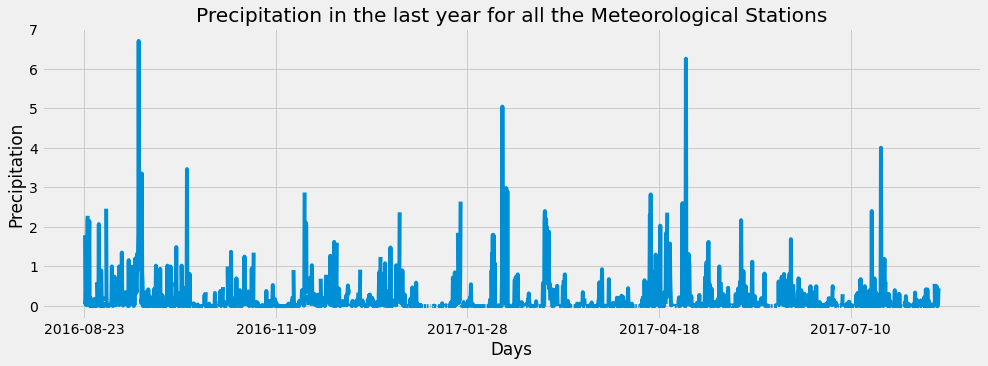

In [8]:
# Use Pandas Plotting with Matplotlib to plot the data

df.plot(figsize=(15,5), legend=None)
plt.xlabel("Days")
plt.ylabel("Precipitation")
plt.title("Precipitation in the last year for all the Meteorological Stations")

In [109]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [110]:
# How many stations are available in this dataset?
session.query(func.count(Station.station)).all()

[(9)]

In [111]:
# What are the most active stations?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [112]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature in the most active station?
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
filter(Measurement.station == 'USC00519281').all()


[(54.0, 85.0, 71.66378066378067)]

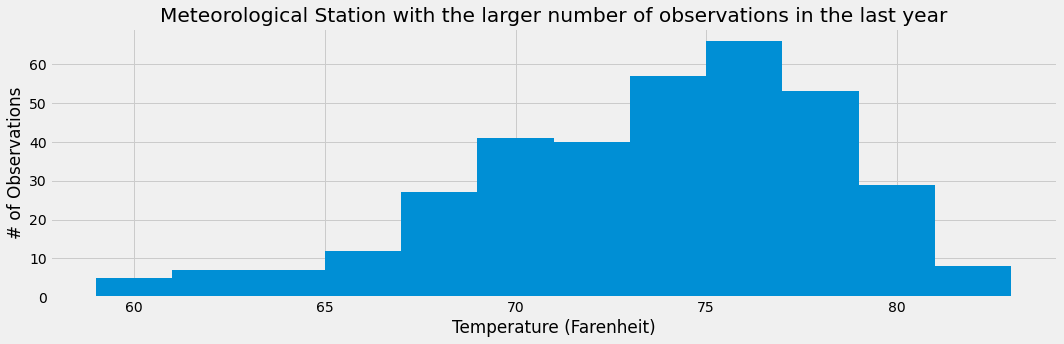

In [113]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
results = session.query(Measurement.tobs).\
filter(Measurement.station == 'USC00519281').\
filter(Measurement.date >= prev_year).all()
df = pd.DataFrame(results, columns=['tobs'])
df.plot.hist(bins=12, figsize=(15,5), legend=None)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("# of Observations")
plt.title("Meteorological Station with the larger number of observations in the last year")
plt.tight_layout()


## SUMMARY STATISTICS FOR JUNE AND DECEMBER

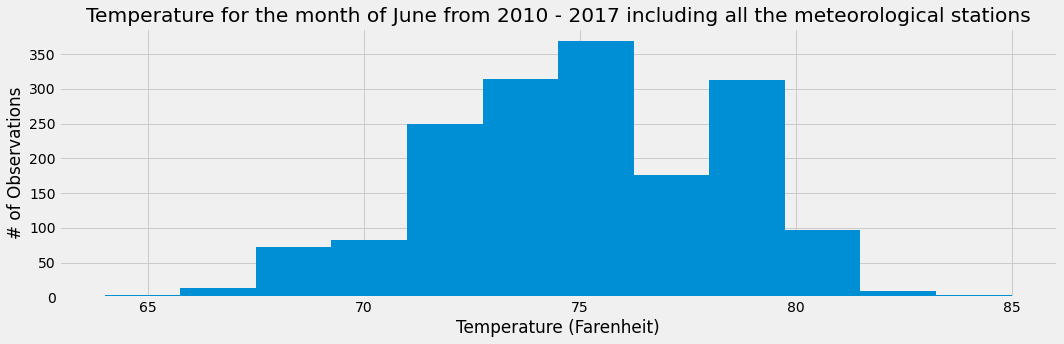

In [9]:
#Temperatures for June. 
results = session.query(Measurement).filter(extract('month',Measurement.date) == 6)

# Convert the June temperatures to a list.
results_list = [temp.tobs for temp in results]

# DataFrame from the list of temperatures for June. 
df = pd.DataFrame(results_list, columns=['June Temp'])

#df.plot.hist()

df.plot.hist(bins=12, figsize=(15,5), legend=None)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("# of Observations")
plt.title("Temperature for the month of June from 2010 - 2017 including all the meteorological stations")
plt.tight_layout()

In [41]:
# Summary statistics for the June temperature
df.describe()

,June Temp
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


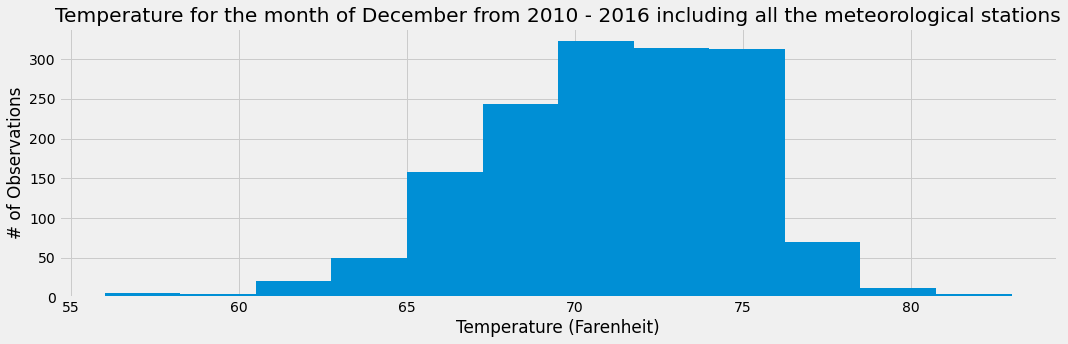

In [10]:
#Temperatures for December. 
results = session.query(Measurement).filter(extract('month',Measurement.date) == 12)

# Convert the June temperatures to a list.
results_list = [temp.tobs for temp in results]

# DataFrame from the list of temperatures for June. 
df = pd.DataFrame(results_list, columns=['Dec Temp'])
df.plot.hist(bins=12, figsize=(15,5), legend=None)
plt.xlabel("Temperature (Farenheit)")
plt.ylabel("# of Observations")
plt.title("Temperature for the month of December from 2010 - 2016 including all the meteorological stations")
plt.tight_layout()

In [44]:
# Summary statistics for the December temperature
df.describe()

,Dec Temp
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000
